In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 교차표
+ 범주형 데이터 분석시 사용하는 분석도구
+ crosstab(인덱스, 컬럼명, 행이름, 열이름, 총합여부, 정규화여부)

In [4]:
data = pd.DataFrame({'id': ['id1', 'id1', 'id1', 'id2', 'id2', 'id3'],
        'col_1': ['a', 'a', 'a', 'b', 'b', 'b'],
        'col_2': ['d', 'd', 'd', 'c', 'c', 'd']})

data

,id,col_1,col_2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [5]:
# 교차표 생성 1 : 인덱스와 열 지정
# id를 기준으로 col1/col2 빈도 조사
pd.crosstab(data.id, data.col_1)

col_1,a,b
id,,
id1,3,0
id2,0,2
id3,0,1


In [6]:
# 교차표에 총합 여부 표시 : margins
pd.crosstab(data.id, data.col_1, margins=True)

col_1,a,b,All
id,,,
id1,3,0,3
id2,0,2,2
id3,0,1,1
All,3,3,6


In [7]:
# 교차표에 비율 여부 표시 : normalize
pd.crosstab(data.id, data.col_1, normalize=True)

col_1,a,b
id,,
id1,0.5,0.000000
id2,0.0,0.333333
id3,0.0,0.166667


## titanic 데이터에 대한 교차표 작성

In [32]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 성별 생존여부

In [26]:
pd.crosstab(titanic.alive, titanic.sex, margins=True)

sex,female,male,All
alive,,,
no,81,468,549
yes,233,109,342
All,314,577,891


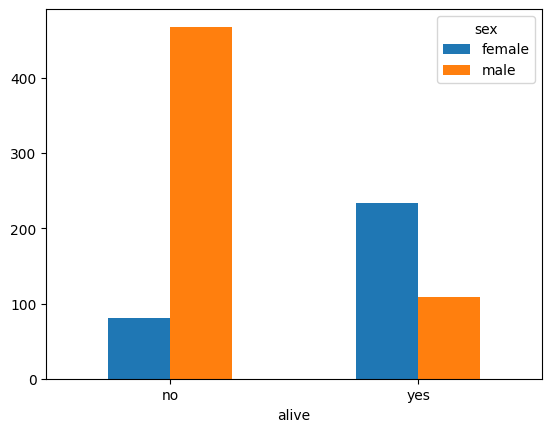

In [29]:
cb = pd.crosstab(titanic.alive, titanic.sex)
cb.plot.bar(rot=0)
plt.show()

### 성별 승선위치별 생존여부

In [30]:
pd.crosstab(titanic.survived, [titanic.sex, titanic.embarked])

sex      female          male         
embarked      C   Q    S    C   Q    S
survived                              
0             9   9   63   66  38  364
1            64  27  140   29   3   77

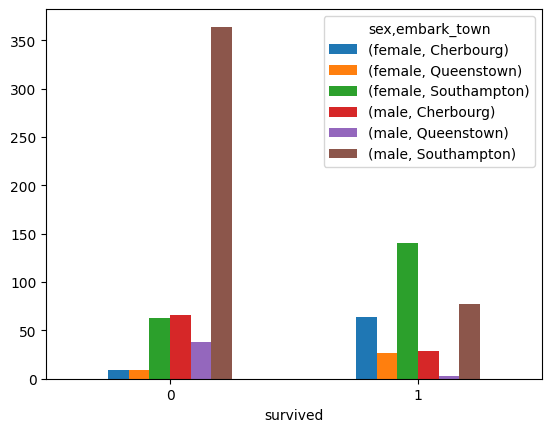

In [31]:
cb = pd.crosstab(titanic.survived, [titanic.sex, titanic.embark_town])
cb.plot.bar(rot=0)
plt.show()

### 성별 좌석등급별 생존여부

In [34]:
pd.crosstab(titanic.survived, [titanic.sex, titanic.deck])

sex      female                       male                  
deck          A   B   C   D   E  F  G    A   B   C  D   E  F
survived                                                    
0             0   0   3   0   1  0  2    8  12  21  8   7  5
1             1  27  24  18  14  5  2    6   8  11  7  10  3

In [48]:
plt.rcParams['font.family'] = 'NanumGothic'  ## 윈도우에 자체 폰트

In [ ]:
import matplotlib as mpl

fontpath = '/usr/share/fonts/NanumGothic.ttf'
#fontpath = '/usr/share/fonts/NanumFont/NanumGothic.ttf'
fname = mpl.font_manager.FontProperties(fname=fontpath).get_name()

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

## 교통사고 데이터에 대한 교차표 작성

In [49]:
car = pd.read_csv('data/car.csv')
car = car.iloc[:,[3,4,10,12]]
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   주야        4119 non-null   object
 1   요일        4119 non-null   object
 2   발생지시도     4119 non-null   object
 3   사고유형_대분류  4119 non-null   object
dtypes: object(4)
memory usage: 128.8+ KB


### 시도별 교통사고 건수

In [ ]:
car.발생지시도.value_counts()

### 시도별 요일별 교통사고 건수

In [39]:
pd.crosstab(car.발생지시도,car.요일)

요일,금,목,수,월,일,토,화
발생지시도,,,,,,,
강원,34,25,28,31,28,34,26
경기,123,109,107,111,78,119,102
경남,58,48,50,54,42,52,55
경북,70,75,62,70,61,70,69
광주,20,10,20,11,11,6,7
대구,24,27,15,16,28,29,11
대전,11,18,10,19,11,16,9
부산,35,21,18,14,18,26,21
서울,69,44,56,36,47,51,39


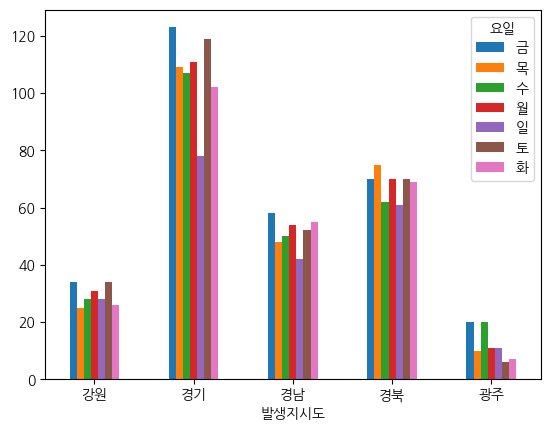

In [50]:
cb = pd.crosstab(car.발생지시도,car.요일).head(5)
cb.plot.bar(rot=0)
plt.show()

### 시도별 사고유형별 교통사고 건수

In [51]:
pd.crosstab(car.발생지시도,car.사고유형_대분류).head(5)

사고유형_대분류,차대사람,차대차,차량단독
발생지시도,,,
강원,66,72,68
경기,314,313,122
경남,134,143,82
경북,155,203,119
광주,40,31,14


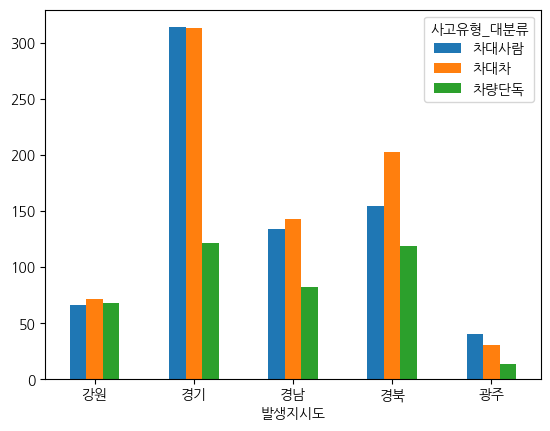

In [52]:
cb = pd.crosstab(car.발생지시도,car.사고유형_대분류).head(5)
cb.plot.bar(rot=0)
plt.show()